In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import data directly from myria

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-particle_stats_byfile/data?format=csv'
result = pd.read_csv(fileURL)
# pick out the subset of variables to use for clustering/PCA
X = result[['fsc_avg','chl_avg','pe_avg','fsc_var','chl_var','pe_var']].values

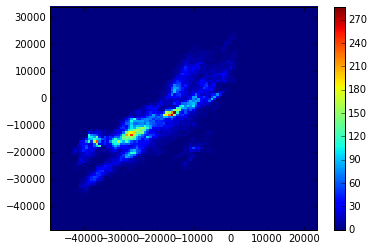

In [3]:
# plot the data to see if it seems to fall into particular clusters right off the bat

plt.hist2d(result['fsc_avg'],result['chl_avg'],bins=100, cmap='jet')
plt.colorbar()
plt.show()

Reduced dataset shape: (47155, 2)


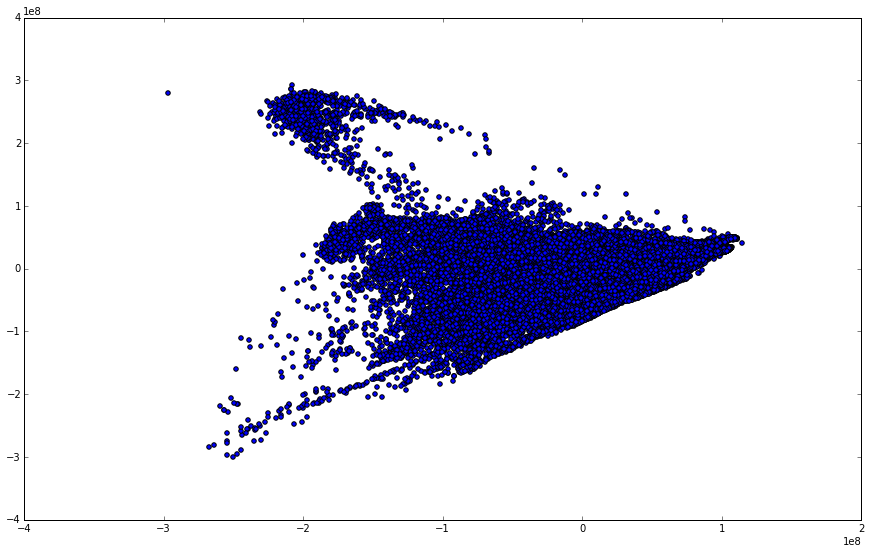

In [4]:
# try doing PCA on the particle statistics
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

fig1 = plt.figure(1, figsize=(15,9))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

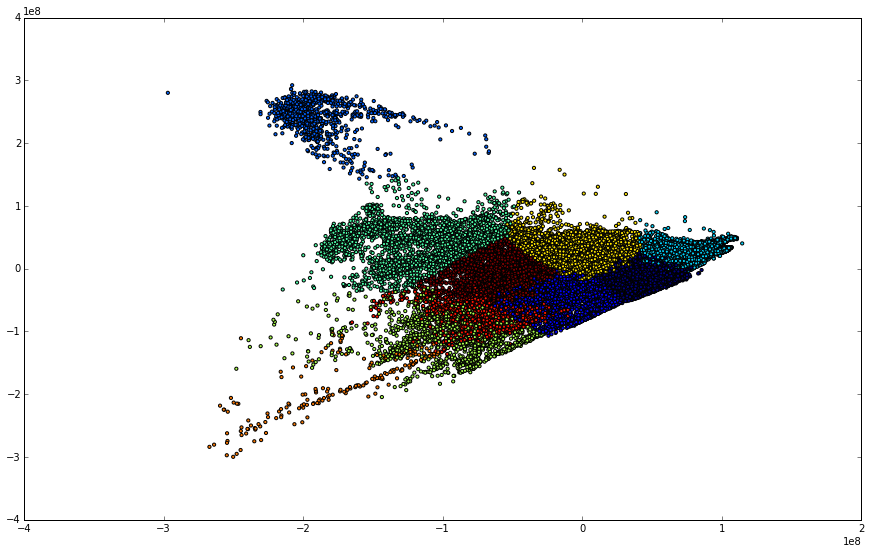

In [5]:
# now try some kind of clustering. 
# start with K-mean
k_means = KMeans(n_clusters=10, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

fig2 = plt.figure(2, figsize=(15,9))
plt.scatter(X_reduced[:,0],X_reduced[:,1],s=10,c=y_pred)
plt.show()

In [6]:
result['group']=y_pred

print result[['Cruise','group']]
print len(pd.unique(result['Cruise']))

            Cruise  group
0       Thompson_5      0
1       Thompson_5      0
2       Thompson_9      0
3      Thompson_11      9
4      Thompson_11      4
5      Thompson_12      3
6          Tokyo_2      0
7          MBARI_1      0
8          MBARI_2      6
9          MBARI_2      6
10      Thompson_1      8
11      Thompson_9      6
12      Thompson_9      5
13      Thompson_9      0
14     Thompson_12      3
15         Tokyo_4      3
16         Tokyo_4      0
17         MBARI_2      6
18      Thompson_1      8
19         Tokyo_2      0
20         Tokyo_3      3
21         MBARI_1      0
22          CMOP_3      8
23          CMOP_3      9
24      Thompson_4      3
25     Thompson_10      6
26         Tokyo_4      6
27         MBARI_1      0
28         MBARI_2      6
29      Thompson_5      3
...            ...    ...
47125   Thompson_0      0
47126   Thompson_0      1
47127   Thompson_5      3
47128   Thompson_9      0
47129   Thompson_9      3
47130  Thompson_10      6
47131  Thomp

IndexError: list index out of range

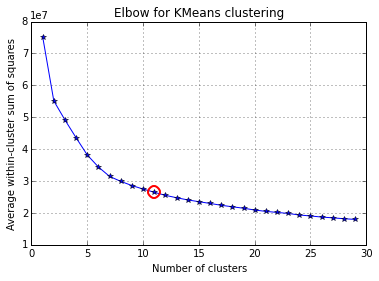

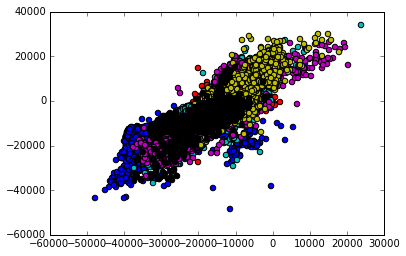

In [11]:
# try hierarchical clustering on the data
# do not have to specify number of clusters

from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

# Start by estimating optimal number of clusters
# uses method from this website: 
# http://stackoverflow.com/questions/6645895/calculating-the-percentage-of-variance-measure-for-k-means
K = range(1,30)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

##### plot ###
kIdx = 10

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.legend()
plt.show()